# Imports

- **Replace Null Values in Age column**

### 4- Handle Outliers

- **Check for Outliers**

In [49]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [50]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df.drop(['PassengerId','Name', 'Ticket'], axis = 1, inplace= True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Chk datatype

In [52]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtype":dtypes, "Num_Uniqe":n_uniq}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,object,float64,int64,int64,float64,object,object
Num_Uniqe,2,3,2,88,7,7,248,147,3


In [53]:
def chk_types(data):
    dtypes = df.dtypes
    n_uniq = df.nunique()
    
    return pd.DataFrame({"Dtype":dtypes, "Num_Uniqe":n_uniq}).T

In [54]:
def chk_types_table(data):
    return pd.DataFrame({
        "Dtype": data.dtypes,
        "Num_Unique": data.nunique()
    }).T


In [55]:
chk_types_table(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,object,float64,int64,int64,float64,object,object
Num_Unique,2,3,2,88,7,7,248,147,3


In [56]:
cols = ['Pclass',
        'Survived',
        'Sex',
        'SibSp',
        'Parch',
        'Embarked']
df[cols] = df[cols].astype('category')


In [57]:
chk_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,category,category,category,float64,category,category,float64,object,category
Num_Uniqe,2,3,2,88,7,7,248,147,3


In [58]:
df.shape[0]

891

In [59]:
null = df.isnull().sum()
ratio = (null/ df.shape[0])*100
pd.DataFrame({"Null":null, "ratio % ":ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
ratio %,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [60]:
median_1 = df['Age'].median()
df['Age'].fillna(median_1, inplace=True)


In [61]:
df.dropna(subset=['Embarked'], inplace= True)
df = df.drop("Cabin", axis=1)

In [62]:
null = df.isnull().sum()
ratio = (null/ df.shape[0])*100
pd.DataFrame({"Null":null, "ratio % ":ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ratio %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


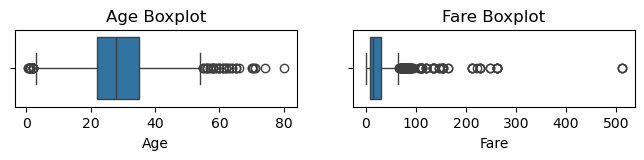

In [63]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i , col in enumerate(num_cols):
    plt.subplot(1,2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} Boxplot")

In [64]:
def outliers_change(num_cols):
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 -  1.5*IQR
        upper_fence = Q3 +  1.5*IQR
        # print(lower_fence)
        lower_outliers = df[df[col]< lower_fence][col].values
        upper_outliers = df[df[col]> upper_fence][col].values
        
        df[col].replace(lower_outliers, lower_fence, inplace=True)
        df[col].replace(upper_outliers, upper_fence, inplace=True)

    # upper_outliers = 
    


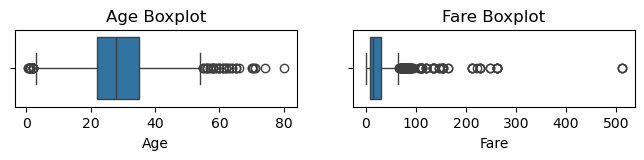

In [65]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i , col in enumerate(num_cols):
    plt.subplot(1,2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} Boxplot")

In [66]:
df.duplicated().sum()

np.int64(116)

In [67]:
df.drop_duplicates(inplace=True)

In [68]:
df.duplicated().sum()

np.int64(0)

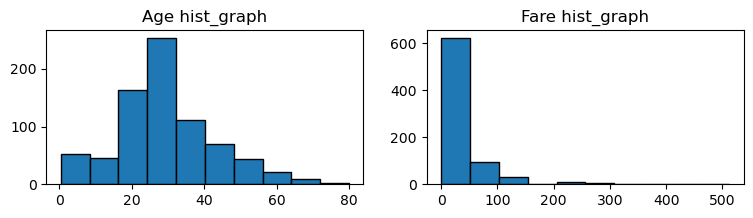

In [69]:
plt.figure(figsize=(9,2))
for i , col in enumerate(num_cols):
    plt.subplot(1, 2, i + 1 )
    plt.hist(df[col], edgecolor = 'black')
    plt.title(f"{col} hist_graph")
plt.show()

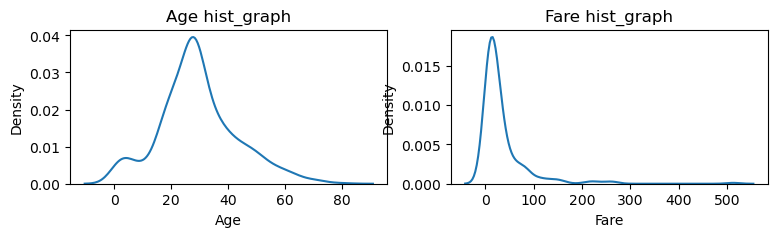

In [70]:
plt.figure(figsize=(9,2))
for i , col in enumerate(num_cols):
    plt.subplot(1, 2, i + 1 )
    sns.kdeplot(df[col])
    plt.title(f"{col} hist_graph")
plt.show()

In [71]:
cat_cols = df.select_dtypes('category').columns

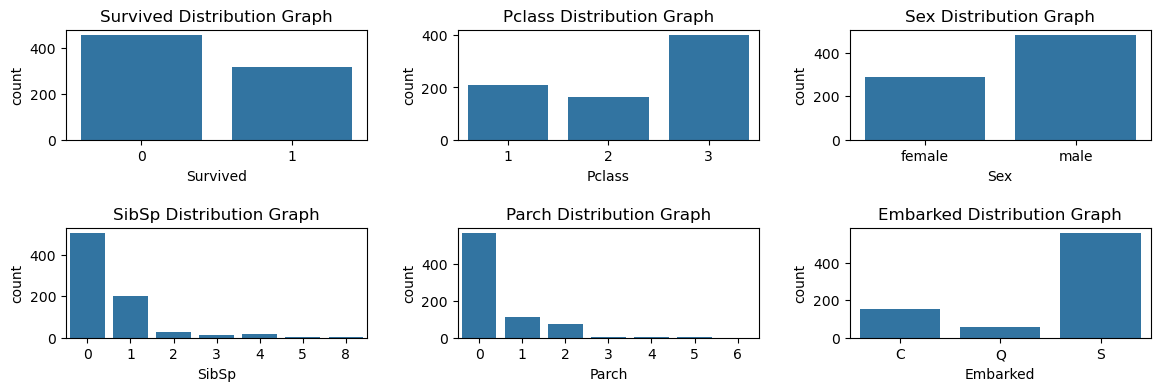

In [72]:
plt.figure(figsize=(14,4))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = col, data=df)
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=.8, wspace=.3)
plt.show()    

In [73]:
unique = df['Survived'].value_counts()
count = unique.values
categories = unique.index


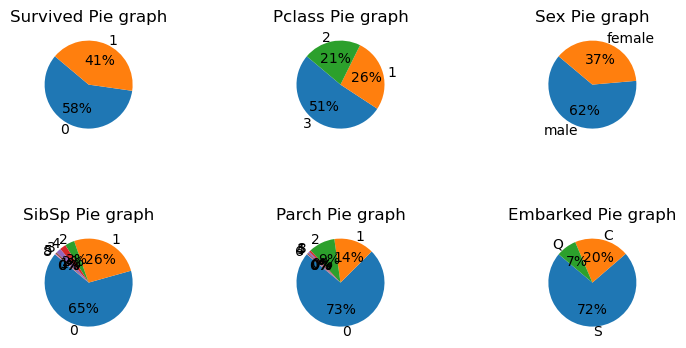

In [74]:
plt.figure(figsize=(9,4))
for i , col in enumerate(cat_cols):
    plt.subplot(2 , 3, i + 1)
    unique = df[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count, labels= categories, startangle=140, autopct= '%1.1d%%')
    plt.title(f"{col} Pie graph")
plt.subplots_adjust(hspace=.8, wspace=.3)
plt.show()    
    

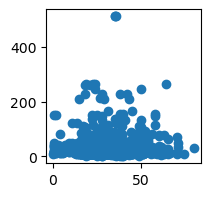

In [75]:
plt.figure(figsize=(2,2))
plt.scatter(df['Age'], df['Fare'])


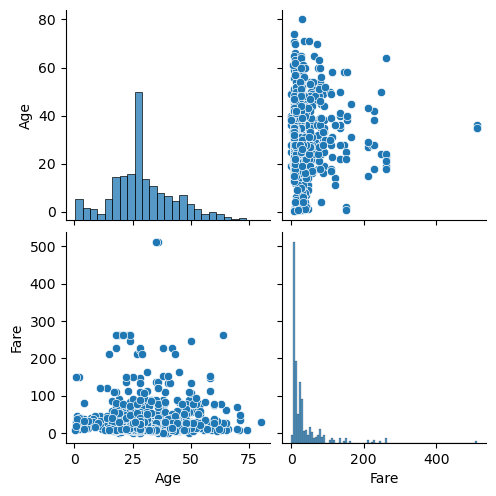

In [76]:
sns.pairplot(df)

In [77]:
df.dtypes

Survived    category
Pclass      category
Sex         category
Age          float64
SibSp       category
Parch       category
Fare         float64
Embarked    category
dtype: object

In [78]:
corr = df.select_dtypes(include='number').corr()
corr


,Age,Fare
Age,1.000000,0.089624
Fare,0.089624,1.000000


In [79]:
agg = df.pivot_table(index='Survived', columns='Sex', values='Age', aggfunc=len)
agg

Sex,female,male
Survived,,
0,76,379
1,214,104


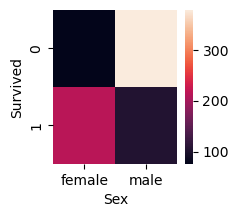

In [80]:
plt.figure(figsize=(2,2))
agg = df.pivot_table(index='Survived', columns='Sex', values='Age', aggfunc=len)
sns.heatmap(agg)
plt.show()

In [81]:
x = df.drop('Survived', axis= 1)
y = df['Survived']

In [82]:
from sklearn.preprocessing import MinMaxScaler
num_cols = x.select_dtypes('number').columns
scaler = MinMaxScaler()
scaler.fit(x[num_cols])
x[num_cols] = scaler.transform(x[num_cols])


In [83]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.271174,1,0,0.014151,S
1,1,female,0.472229,1,0,0.139136,C
2,3,female,0.321438,0,0,0.015469,S
3,1,female,0.434531,1,0,0.103644,S
4,3,male,0.434531,0,0,0.015713,S
...,...,...,...,...,...,...,...
885,3,female,0.484795,0,5,0.056848,Q
887,1,female,0.233476,0,0,0.058556,S
888,3,female,0.346569,1,2,0.045771,S
889,1,male,0.321438,0,0,0.058556,C


In [84]:
str_cols = ['Sex','Embarked']

In [85]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols = str_cols, drop_invariant= True)
x = encoder.fit_transform(x)

In [86]:
x

,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,Embarked_3
0,3,1,0,0.271174,1,0,0.014151,1,0,0
1,1,0,1,0.472229,1,0,0.139136,0,1,0
2,3,0,1,0.321438,0,0,0.015469,1,0,0
3,1,0,1,0.434531,1,0,0.103644,1,0,0
4,3,1,0,0.434531,0,0,0.015713,1,0,0
...,...,...,...,...,...,...,...,...,...,...
885,3,0,1,0.484795,0,5,0.056848,0,0,1
887,1,0,1,0.233476,0,0,0.058556,1,0,0
888,3,0,1,0.346569,1,2,0.045771,1,0,0
889,1,1,0,0.321438,0,0,0.058556,0,1,0


In [87]:
import plotly.express as px
import plotly.graph_objects as pg

In [90]:
px.pie(df,names='Survived',
       title='<b>Survived distribution </b>',
       color_discrete_sequence=px.colors.qualitative.Pastel,
       hole=0.4)

In [ ]:
# counts=df['Survived'].value_counts
# px.pie(counts.values(),
#        title='<b>Survived distribution </b>',
#        color_discrete_sequence=px.colors.qualitative.Pastel,
#        hole=0.4)

In [96]:
fig =  px.pie (df,names='Survived',
        title='<b>Survived distribution </b>',
        color_discrete_map={0:'blue',
                            1:'red'},
        category_orders={'Survived':['1','0']},
        hole=0.2)
fig.show()

In [100]:
fig =  px.pie (df,names='Survived',
        title='<b>Survived distribution </b>',
        color_discrete_map={0:'blue',
                            1:'red'},
        category_orders={'Survived':['1','0']},
        hole=0.4)
fig.update_layout(annotations=[dict(text='Survived',font_size=20,x=0.5,y=0.5,showarrow=False)])

In [104]:
fig=px.histogram(df,x='Survived',color='Sex',title='<b>survived based on Gender',barmode='group')
fig.update_layout(width=500,height=400,bargap=0.4)

In [109]:
import plotly.subplots as sp
import plotly.graph_objects as go

fig = sp.make_subplots(rows=1, cols=len(num_cols), subplot_titles=num_cols)

for i, clo in enumerate(num_cols):
    fig.add_trace(
        go.Histogram(
            x=df[clo],
            name=clo,
            marker=dict(line=dict(color='black', width=1))
        ),
        row=1, col=i+1
    )

fig.update_layout(title_text="Distribution of Numeric Columns")
fig.show()


In [ ]:
from dash  import Dash
